### Data 88: Data Science for Genetics and Genomics - 09/17/19

# *Lab 1 - Comparative Genomics with EDA*

### by Jonathan Fischer (adapted in part from work by Shishi Luo) 

In [1]:
# Import the necessary modules
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
plt.style.use('fivethirtyeight')

## Let's explore genome sizes for some commonly studied organisms

In [2]:
# Load table of model organisms
# name your table model_species

# Hints:
# table_name = Table.read_table('filename')
# filename = https://raw.githubusercontent.com/ds-connectors/Data88-Genetics_and_Genomics/master/Lab01/model_species.csv

model_species = Table.read_table('https://raw.githubusercontent.com/ds-connectors/Data88-Genetics_and_Genomics/master/Lab01/model_species.csv')


In [3]:
# We can see the whole table with the table_name.show() command. table_name will show the first 10 rows. Try it out!
# table_name.show()

#model_species
model_species.show()

Scientific name,Common name,Genes,Proteins,Size
Escherichia coli,E. coli,5618,5358,5478680
Arabidopsis thaliana,A. thaliana,33583,35378,119668000
Caenorhabditis elegans,C. elegans,46711,27943,100286000
Danio rerio,Zebrafish,39803,47861,1371720000
Drosophila melanogaster,Fruit fly,17651,30443,143726000
Gallus gallus,Chicken,25062,46393,1230260000
Mus musculus,Mouse,48855,78065,2803570000
Saccharomyces cerevisiae S288c,Yeast,6350,5907,12157100
Rattus norvegicus,Rat,37647,50706,2870180000
Zea mays,Corn (maize),104305,116015,2067620000


In [5]:
# Let's rank organisms by their genome size. To sort the table, 
# use table_name.sort('Column_name').show()
# to sort in descending order, use the additional option like so: 
# table_name.sort('Column_name', descending = True).show()
# Try both ways out

#model_species.sort('Size').show()
model_species.sort('Size',descending = True).show()

Scientific name,Common name,Genes,Proteins,Size
Rattus norvegicus,Rat,37647,50706,2870180000
Mus musculus,Mouse,48855,78065,2803570000
Canis lupus familiaris,Dog,30186,47089,2410980000
Ailuropoda melanoleuca,Giant panda,27613,32507,2299510000
Zea mays,Corn (maize),104305,116015,2067620000
Danio rerio,Zebrafish,39803,47861,1371720000
Gallus gallus,Chicken,25062,46393,1230260000
Oryza sativa Japonica Group,Rice,66100,81951,374423000
Drosophila melanogaster,Fruit fly,17651,30443,143726000
Arabidopsis thaliana,A. thaliana,33583,35378,119668000


In [6]:
# Can we extract just the organisms with more than 60,000 genes? This is the rough number that humans have. 
# This is done by table_name.where(table_name['Column_name'] ~ condition). 
# ~ in the above is the operator for the condition. In this case, it's > for greater than

model_species.where(model_species['Genes'] > 60000)

Scientific name,Common name,Genes,Proteins,Size
Zea mays,Corn (maize),104305,116015,2067620000
Oryza sativa Japonica Group,Rice,66100,81951,374423000


## Let's compare the genome sizes of some pathogens

In [28]:
# Load pathogen information. Name the table pathogens
# See Cell 2 for a hint
# filename is https://raw.githubusercontent.com/ds-connectors/Data88-Genetics_and_Genomics/master/Lab01/pathogens.csv

pathogens = Table.read_table('https://raw.githubusercontent.com/ds-connectors/Data88-Genetics_and_Genomics/master/Lab01/pathogens.csv')


In [29]:
# Display full table. How many organisms does it have? Hint: Table.num_rows
# See Cell 3 if you need a hint

pathogens.num_rows
pathogens.sort('Genes', descending = False).show()

Scientific name,Description,Subgroup,Size,Genes,Proteins
West Nile Virus,West Nile Virus,Virus,0.011,3,3
Zika Virus,Zika,Virus,0.011,3,3
Measles morbillivirus,Measles,Virus,0.016,8,8
Sudan ebolavirus,Ebola,Virus,0.019,9,9
HIV,HIV,Virus,0.0088,10,10
Dengue virus,Dengue fever,Virus,0.011,10,10
Influenza A,Flu,Virus,0.013,11,11
Variola major,Smallpox,Virus,0.19,206,206
Helicobacter pylori,H. pylori,Bacteria,1.6,1587,1545
Streptococcus pyogenes,Strep throat,Bacteria,1.91,2008,1860


With so many organisms, it can be hard to interpret the table. Histograms are a great way to visualize the distribution of a quantity of interest.

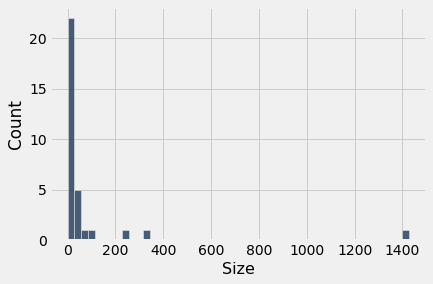

In [30]:
# Histogram of genome sizes (in megabases)
# object.hist('column_name', bins = b, normed = n)
# b gives the number of bins in the histogram
# n is either True or False for whether bin heights should be normalized by number of observations
# Choose 20 bins and normed = False

pathogens.hist('Size', bins = 50, normed = False)

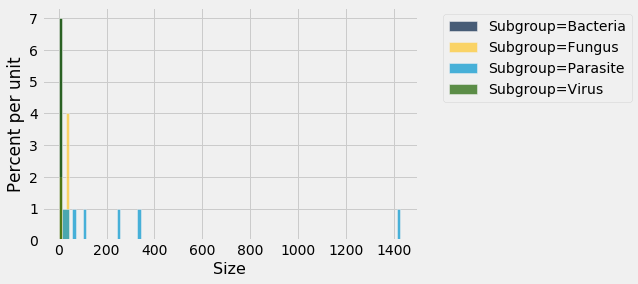

In [31]:
# Histograms of genome sizes split by subgroup (aka pivot histograms)
# Let's normalize by frequency here because each group may have a different number of 
# object.hist('column_name', group = variable_to_group_by, bins = b, normed = n)

pathogens.hist('Size', group = 'Subgroup', 
                   normed=True, orientation='vertical', bins = 100)

(0.5605670844759859, 0.0008468974067117505)
SpearmanrResult(correlation=0.961305719447032, pvalue=2.3915118381596974e-18)


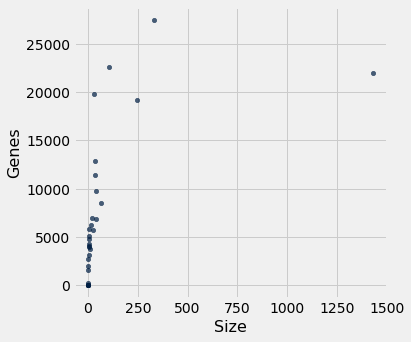

In [32]:
# Make scatterplot of the number of genes vs the genome size in pathogens
# Also print Pearson and Spearman correlations. 
# Command is print(sp.pearsonr(table['Variable1'], table['Variable2'])) or
# print(sp.spearmanr(table['Variable1'], table['Variable2']))
# Number of genes on Y axis, genome size on X axis
# object.scatter('X_column', 'Y_column')

pathogens.scatter('Size', 'Genes')
print(sp.pearsonr(pathogens['Size'], pathogens['Genes']))
print(sp.spearmanr(pathogens['Size'], pathogens['Genes']))

(0.9997453346178793, 5.808095711238621e-51)
SpearmanrResult(correlation=0.9996332966629998, pvalue=1.3768563685902517e-48)


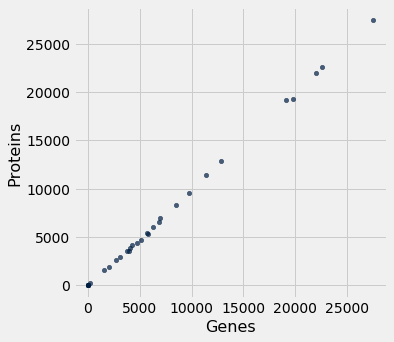

In [33]:
# Make scatterplot of the number of proteins vs number of genes in pathogens
# Number of proteins on Y axis, number of genes on X axis
# object.scatter('X_column', 'Y_column')
# print respective correlations

pathogens.scatter('Genes', 'Proteins')
print(sp.pearsonr(pathogens['Genes'], pathogens['Proteins']))
print(sp.spearmanr(pathogens['Genes'], pathogens['Proteins']))

In [34]:
# Compute the mean, median, standard deviation, and interquartile range for 
# the genome sizes, number of genes, and number of proteins. Store them in a table with 
# Size, Genes, and Proteins as the columns

# mean: np.mean, median: np.median, standard deviation: np.std, IQR: sp.iqr
# Put these into a table names pathogen_summary with columns corresponding to Size, Genes, and Proteins

# Example of how to construct a table
#t = Table().with_columns([
#    'letter', ['a', 'b', 'c', 'z'],
#    'count',  [  9,   3,   3,   1],
#    'points', [  1,   2,   2,  10],
#]) 


pathogen_summary = Table().with_columns([
    'Value', ['Mean', 'Median', 'SD', 'IQR'],
    'Size', [np.mean(pathogens['Size']), np.median(pathogens['Size']), np.std(pathogens['Size']), sp.iqr(pathogens['Size'])],
    'Genes', [np.mean(pathogens['Genes']), np.median(pathogens['Genes']), np.std(pathogens['Genes']), sp.iqr(pathogens['Genes'])],
    'Proteins', [np.mean(pathogens['Proteins']), np.median(pathogens['Proteins']), np.std(pathogens['Proteins']), sp.iqr(pathogens['Proteins'])],
])

pathogen_summary
                                                                                                                  

Value,Size,Genes,Proteins
Mean,76.8761,6898.06,6752.53
Median,5.015,4536.5,4259
SD,252.748,7470.63,7469.78
IQR,35.185,7585,7415


## Let's repeat this analysis but for animals

In [16]:
# Load animal information. Name the table animals
# See Cell 2 for a hint
# filename is https://raw.githubusercontent.com/ds-connectors/Data88-Genetics_and_Genomics/master/Lab01/animals.csv

animals = Table.read_table('https://raw.githubusercontent.com/ds-connectors/Data88-Genetics_and_Genomics/master/Lab01/animals.csv')

In [17]:
# Display full table. How many organisms does it have? Hint: Table.num_rows
# See Cell 3 if you need a hint

#animals.num_rows
animals.sort('Genes', descending = False).show()

Scientific name,Description,Subgroup,Size,Genes,Proteins
Pan paniscus,Bonobo,Mammals,3286.64,95,15
Salmo salar,Atlantic salmon,Fishes,2966.89,116,13
Macaca mulatta,Rhesus macaque,Mammals,3236.22,186,99
Bombus terrestris,Large bumblebee,Insects,248.654,11188,20321
Tribolium castaneum,Red flour beetle,Insects,210.265,13181,18076
Anopheles gambiae,Mosquito,Insects,265.027,13184,14099
Apis mellifera,Western honey bee,Insects,250.287,13401,21777
Nasonia vitripennis,Small wasp,Insects,295.781,14273,24671
Drosophila simulans,Fruit fly,Insects,124.966,15229,24119
Schistosoma mansoni,Blood fluke,Flatworms,364.538,15882,11787


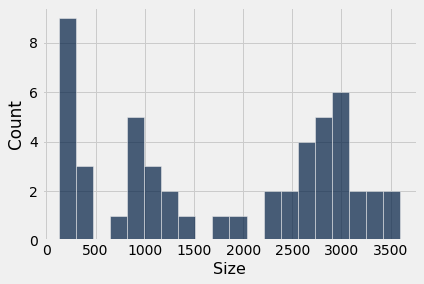

In [18]:
# Histogram of genome sizes (in megabases)

animals.hist('Size', bins = 20, normed = False)

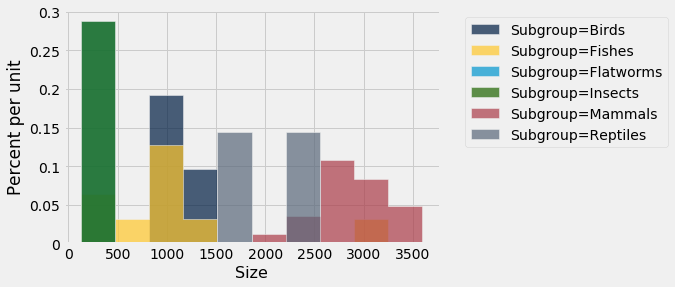

In [19]:
# Histograms of genome sizes split by Subgroup (aka pivot histograms)
# Let's normalize by frequency here because each group may have a different number of 

animals.hist('Size', group = 'Subgroup', 
                   normed=True, orientation='vertical')

(0.4311571793582962, 0.0015849234416391465)
SpearmanrResult(correlation=0.5430769230769231, pvalue=3.827883791479075e-05)


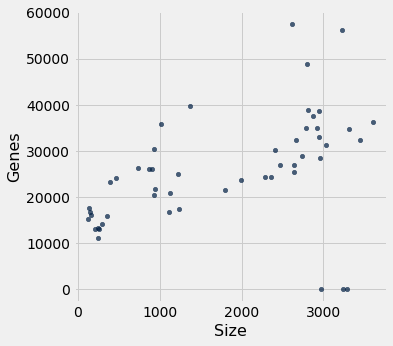

In [20]:
# Make scatterplot of the number of genes vs the genome size in animals
# Print correlations

animals.scatter('Size', 'Genes')
print(sp.pearsonr(animals['Size'], animals['Genes']))
print(sp.spearmanr(animals['Size'], animals['Genes']))

(0.9295083298077683, 7.208775414774146e-23)
SpearmanrResult(correlation=0.9199999999999999, pvalue=1.4318281668150298e-21)


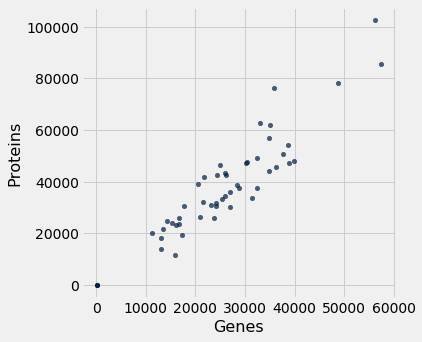

In [21]:
# Make scatterplot of the number of proteins vs number of genes in animals
# Print correlations

animals.scatter('Genes', 'Proteins')
print(sp.pearsonr(animals['Genes'], animals['Proteins']))
print(sp.spearmanr(animals['Genes'], animals['Proteins']))

In [35]:
# Table of summary statistics (name it animal_summary)

animal_summary = Table().with_columns([
    'Value', ['Mean', 'Median', 'SD', 'IQR'],
    'Size', [np.mean(animals['Size']), np.median(animals['Size']), np.std(animals['Size']), sp.iqr(animals['Size'])],
    'Genes', [np.mean(animals['Genes']), np.median(animals['Genes']), np.std(animals['Genes']), sp.iqr(animals['Genes'])],
    'Proteins', [np.mean(animals['Proteins']), np.median(animals['Proteins']), np.std(animals['Proteins']), sp.iqr(animals['Proteins'])],
])

animal_summary

Value,Size,Genes,Proteins
Mean,1789.72,25684.8,37858.8
Median,1995.61,25364,36064
SD,1155,11986.4,20125.1
IQR,2038.63,15703,21864


# Bonus exercises

## Comparing pathogens and animals

In [52]:
# We need to merge the tables before comparing. Name the new table merged

# First, add a new column named 'Type' to each table which says either 'Pathogens' or 'Animals'
# Hint: table.append_column(column_name, word)

pathogens.append_column('Type', 'Pathogens')
animals.append_column('Type', 'Animals')

# First set merged equal to pathogens.copy(). This creates a copy of the pathogens table
# and sets the new table merged equal to the copy. This avoids aliasing, in which 
# merged = pathogens stores these as the same object.

merged = pathogens.copy()

# Then use the table.append(table2) syntax to merge the tables
merged = merged.append(animals)

merged.show()


Scientific name,Description,Subgroup,Size,Genes,Proteins,Type
Yersina pestis,Plague,Bacteria,4.93,4773,4390,Pathogens
Mycobacterium tuberculosis,Tuberculosis,Bacteria,4.41,4300,4128,Pathogens
Escherichia coli,E. coli,Bacteria,5.1,5084,4721,Pathogens
Helicobacter pylori,H. pylori,Bacteria,1.6,1587,1545,Pathogens
Bacillus anthracis,Anthrax,Bacteria,5.49,5804,5299,Pathogens
Clostridium tetani,Tetanus,Bacteria,2.81,2740,2624,Pathogens
Bordetella pertussis,Whooping cough,Bacteria,4.1,3987,3574,Pathogens
Staphylococcus aureus,Staph infection,Bacteria,2.98,3115,2944,Pathogens
Streptococcus pyogenes,Strep throat,Bacteria,1.91,2008,1860,Pathogens
Vibrio cholerae,Cholera,Bacteria,4.36,4099,3808,Pathogens


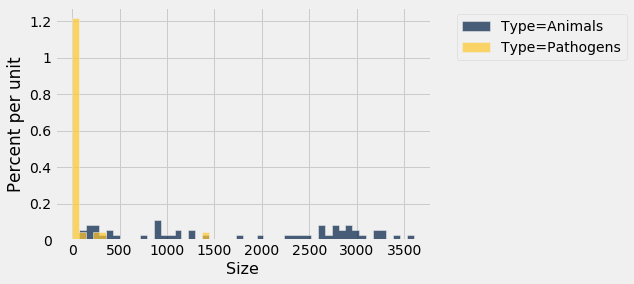

In [48]:
# Make the normalized pivot histogram of genome sizes with 50 bins
merged.hist('Size', group = 'Type', 
                   normed=True, orientation='vertical', bins = 50)

### The scaling is kind of distorted because of the wide range of values. Perhaps a log transformation would make things look better?

In [26]:
# Append a new column named 'Log size'
# Use np.log10 to take the log10 of the 'Size' column. Remember that these are in Mb, so you should add 6 after taking the log!

merged.append_column('Log size', np.log10(merged['Size'])+6)

Scientific name,Description,Subgroup,Size,Genes,Proteins,Type,Log size
Yersina pestis,Plague,Bacteria,4.93,4773,4390,Pathogens,6.69285
Mycobacterium tuberculosis,Tuberculosis,Bacteria,4.41,4300,4128,Pathogens,6.64444
Escherichia coli,E. coli,Bacteria,5.1,5084,4721,Pathogens,6.70757
Helicobacter pylori,H. pylori,Bacteria,1.6,1587,1545,Pathogens,6.20412
Bacillus anthracis,Anthrax,Bacteria,5.49,5804,5299,Pathogens,6.73957
Clostridium tetani,Tetanus,Bacteria,2.81,2740,2624,Pathogens,6.44871
Bordetella pertussis,Whooping cough,Bacteria,4.1,3987,3574,Pathogens,6.61278
Staphylococcus aureus,Staph infection,Bacteria,2.98,3115,2944,Pathogens,6.47422
Streptococcus pyogenes,Strep throat,Bacteria,1.91,2008,1860,Pathogens,6.28103
Vibrio cholerae,Cholera,Bacteria,4.36,4099,3808,Pathogens,6.63949


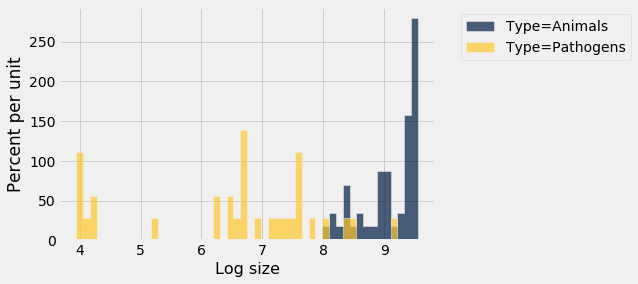

In [27]:
# Make the normalized pivot histogram of genome sizes with 50 bins
merged.hist('Log size', group = 'Type', 
                   normed=True, orientation='vertical', bins = 50)